# This notebook describes the different peak classification parameters returned by 'identify_diad_peaks'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.70'

## Lets grab an example file to take a look at what these parameters mean

In [2]:
# Tweak parameters away from the default here
diad_id_config=pf.diad_id_config(height=1, prominence=50, width=0.5)
diad_id_config

diad_id_config(height=1, width=0.5, prominence=50, plot_figure=True, exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362))

,filename,approx_split,Diad1_pos,Diad2_pos,HB1_pos,HB2_pos,C13_pos,Diad1_abs_prom,Diad2_abs_prom,HB1_abs_prom,...,HB2_height,C13_height,Diad1_height,HB1_height,Diad1_Median_Bck,Diad2_Median_Bck,C13_HB2_abs_prom_ratio,Diad2_HB2_Valley_prom,HB1_prom/std_betweendiads,HB2_prom/std_betweendiads
3,POC30.txt,103.105331,1285.708807,1388.814138,1265.555152,1410.078581,1370.563119,2034.327442,3628.190449,144.951512,...,985.846425,783.412318,2754.660785,860.951512,720.333343,718.5,5.218489,1.014822,70.368754,132.780793


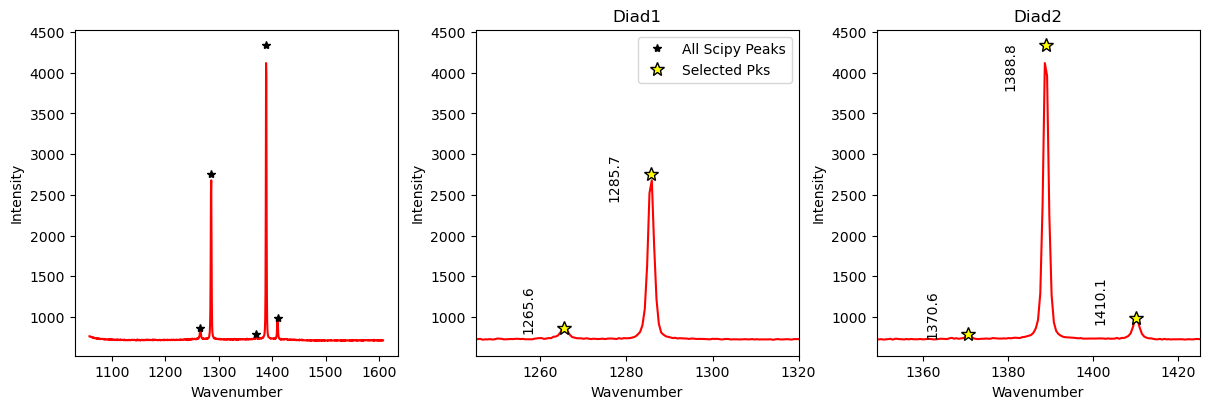

In [3]:
# Check it has found the peaks of interest. Here we are looking at the 1st file
import os
spectra_path=os.getcwd()
filetype='headless_txt'
df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config, 
path=spectra_path, filename='POC30.txt',
filetype=filetype, plot_figure=True, 
)
df_peaks

## Lets get the actual data

In [4]:
Diad = np.array(pf.get_data(path=spectra_path, filename='POC30.txt', filetype='headless_txt'))
Diad_x=Diad[:, 0]
Diad_y=Diad[:, 1]

## Peak positions: 'Diad1_pos', 'Diad2_pos','HB1_pos', 'HB2_pos', 'C13_pos' 
- These outputs give the x location of the peak found by Scipy find peaks after fitting a cubic spline through the data
- These are not the same peak positions you will get after proper fitting with voigts, but they are a good first approximation. They are the positions marked on the figure above. 

## Absolute peak prominences - 'Diad1_abs_prom', 'Diad2_abs_prom', 'HB1_abs_prom', 'HB2_abs_prom', 'C13_abs_prom'
- These variables represent the absolute intensity of the peak relative to the median value of a background region close to the peak
## Relative peak prominences - 'Diad1_rel_prom', 'Diad2_rel_prom', 'HB1_rel_prom', 'HB2_rel_prom', 'C13_rel_prom'
- The intensity of the peak divided by the median intensity of the background. Can be useful to spot relative prominences in spectra with high backgrounds 
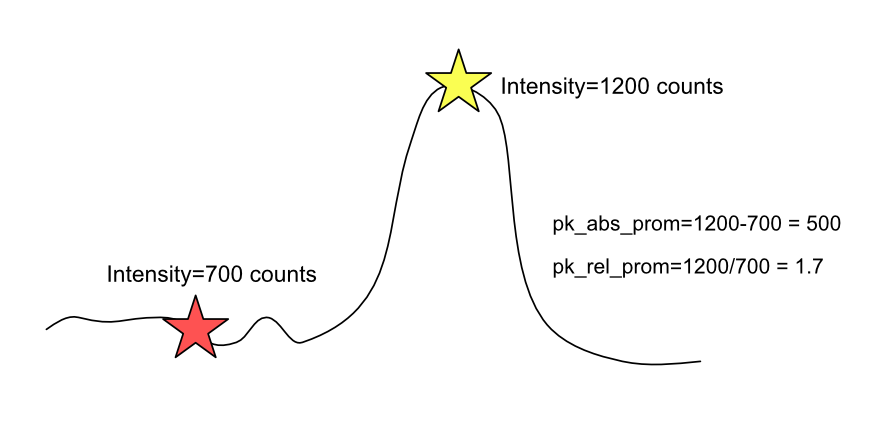
## Useful averages and combinations of these parameters
 - 'Mean_abs_HB_prom' - mean of 'HB1_abs_prom' and 'HB2_abs_prom'
 - 'Diad2_HB2_abs_prom_ratio' = 'Diad2_abs_prom' divided by HB2_abs_prom'
 - 'Diad1_HB1_abs_prom_ratio' = 'Diad1_abs_prom' divided by HB1_abs_prom'

### Background choices for prominence: Diad1 and Diad2
- For Diad1 and Diad2, we define the cyan and yellow background positions, get the median for each, and average them as the 'background' position in the sketch above
- in the identify_diad_peaks function, you can set the offset from the Diad1 and Diad2 position that you want these left and right hand backgroudns to be, and the width

- These background choices are set in the config file, you can overwrite theme here

In [5]:
diad_id_config=pf.diad_id_config()
diad_id_config

diad_id_config(height=1, width=0.5, prominence=50, plot_figure=True, exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362))

Text(0.02, 0.8, 'Diad2_abs_prom =2754.7-718.5')

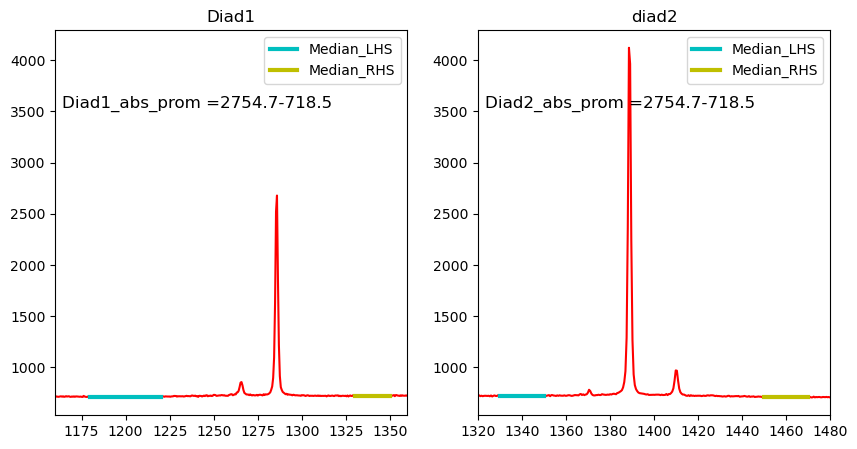

In [6]:
Med_LHS_diad1=np.nanmedian(Diad_y[(Diad[:, 0]>diad_id_config.LH_bck_diad1[0])& (Diad[:, 0]<diad_id_config.LH_bck_diad1[1])])
Med_RHS_diad1=np.nanmedian(Diad_y[(Diad[:, 0]>diad_id_config.RH_bck_diad1[0])& (Diad[:, 0]<diad_id_config.RH_bck_diad1[1])])
Med_bck_diad1=(Med_LHS_diad1+Med_RHS_diad1)/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Diad1')
ax1.plot(Diad[:, 0], Diad[:, 1], '-r')
ax1.plot([1180, 1220], [Med_LHS_diad1, Med_LHS_diad1], '-c', label='Median_LHS', lw=3)
ax1.plot([1330, 1350], [Med_RHS_diad1, Med_RHS_diad1], '-y', label='Median_RHS', lw=3)
ax1.legend()
ax1.set_xlim([1160, 1360])

Med_LHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>diad_id_config.LH_bck_diad2[0])& (Diad[:, 0]<diad_id_config.LH_bck_diad2[1])])
Med_RHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>diad_id_config.RH_bck_diad2[0])& (Diad[:, 0]<diad_id_config.RH_bck_diad2[1])])
Med_bck_diad2=(Med_RHS_diad2+Med_LHS_diad2)/2

ax2.set_title('diad2')
ax2.plot(Diad[:, 0], Diad[:, 1], '-r')
ax2.plot([1330, 1350], [Med_LHS_diad2, Med_LHS_diad2], '-c', label='Median_LHS', lw=3)
ax2.plot([1450, 1470], [Med_RHS_diad2, Med_RHS_diad2], '-y', label='Median_RHS', lw=3)
ax2.legend()
ax2.set_xlim([1320, 1480])

ax1.annotate("Diad1_abs_prom =" + str(np.round(df_peaks['Diad1_height'].iloc[0], 1)) + '-' +str(np.round(Med_bck_diad2, 1))  
             , xy=(0.02, 0.8), xycoords="axes fraction", fontsize=12)

ax2.annotate("Diad2_abs_prom =" + str(np.round(df_peaks['Diad1_height'].iloc[0], 1)) + '-' +str(np.round(Med_bck_diad2, 1))  
             , xy=(0.02, 0.8), xycoords="axes fraction", fontsize=12)


### Background choices for prominence: HB1 and HB2
- HB1_abs_prom is defined as the height of the HB1 relative to the median value of the cyan background window on the 'Diad1' diagram above. 
- HB2_abs_prom is defined as the height of HB2 relative to the median value of the yellow backgroudn window on the 'Diad2' diagram above

### Background choices for prominence: C13
- The background for the C13 peak is taken as the 25% quantile of all the intensity values between the 3 wavenumbers to the left of the C13 peak positoin, and 3 wavenumbers to the right

## Ratios of different absolute prominence values

### Diad2_HB2_abs_prom_ratio
- Absolute prominence of Diad2/Absolute prominence of HB2
### Diad1_HB1_abs_prom_ratio
- Absolute prominence of Diad2/Absolute prominence of HB2

## Elevation of overall diad region: Diad2_HB2_Valley_prom, Diad1_HB1_Valley_prom
- These variables quantify the relative height of the valley between the hotband and the diad, and the surrounding background
- This is very useful to determine how elevated the overall diad region is, for determining which spectra need to be classified as 'strong' where a gaussian peak is fitted
- The code finds the minimum intensity value between the HB and the Diad
- It then divides this by the median position of the backgrounds defined above (yellow and cyan lines). 
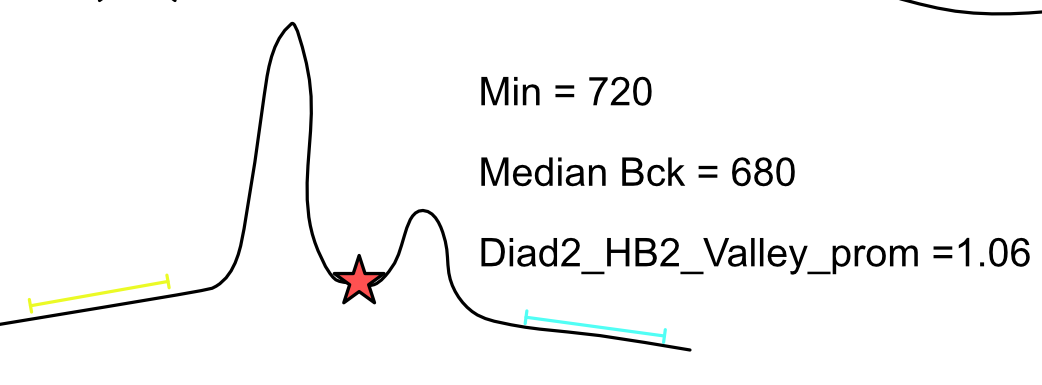

### Mean_Diad_HB_Valley_prom
- Simply the mean of Diad2_HB2_Valley_prom and Diad1_HB1_Valley_prom

## Signal to noise ratios: 'Diad1_prom/std_betweendiads', 'Diad2_prom/std_betweendiads'
- For these parameters, we take the region between the diads defined by the 1st value of diad_id_config.RH_bck_diad1 and the second value of diad_id_config.LH_bck_diad2
- We then calculate the standard deviation of all the y coordinates in this region
- We then divide the absolute prominence of each diad by this value. 

### Diad2_HB2_abs_prom_ratio
- This is defined as the absolute prominence of Diad2 divided by absolute prominence of HB2
### Diad1_HB1_abs_prom_ratio
- This is defined as the absolute prominence of Diad1 divided by absolute prominence of HB1
